In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import scrapy
import string
import nltk
import re
import langid
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from contractions import contractions_list

In [14]:
housing_data = pd.read_csv("housingdata.csv")
new_row = list(housing_data.columns.values)
housing_data.loc[len(housing_data)] = new_row
housing_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                       'B', 'LSTAT', 'MEDV']
housing_data[housing_data.columns] = housing_data[housing_data.columns].apply(pd.to_numeric)


In [15]:
pakistan_suicide_attacks = pd.read_csv("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

In [26]:
dummy_df1 = pd.DataFrame(data={'c1': {0,1,2}, 'c2':["let's see the dog", "he came to see me!", "that's it?"]})

In [16]:
def explore_dataset(df=housing_data, show_histograms = True, show_boxplots = True):
    print("Number of columns in dataset: {0}".format(len(df.columns)))
    
    print("**********************************************************************************************\n")
    
    print("Column names:")
    print(df.columns.values)
    
    print("**********************************************************************************************\n")
    
    print("Here are the first 5 rows:")
    print(df.head())
    
    print("**********************************************************************************************\n")
    
    print(df.describe())
    
    
    print("**********************************************************************************************\n")
    
    #check for missing values
    print("Number of missing values per column:")
    print(df.isnull().sum())
    
    print("**********************************************************************************************\n")
    
    #Is the variable continuous, count, ordinal, categorial, missing, censored
    print("Column Types:")
    print(df.dtypes)
    
    print("**********************************************************************************************\n")
    
    ##Is there inconsistent text entry in a column  
    #check_text_data(df)
    
    
    #make histograms
    if show_histograms:
        plot_histograms(df)
    
    #make boxplots
    if show_boxplots:
        plot_boxplots(df)
    pass
    

In [17]:
def check_text_data(df):
    '''
    This function examines all the columns with text data to check for inconsistencies
    
    df: a dataframe
    return: None
    '''
    
    df_text_columns = get_text_columns(df)
    
    if df_text_columns.empty:
        print("there are no text columns")
    else:    
        #check for all the unique entries in each text column
        for column in df_text_columns:
            print("\n====================================================================================\n")
            print("\nHere are the unique entries in column {0}:".format(df_text_columns[column].name))
            unique_entries = df_text_columns[column].unique()
            try:
                unique_entries.sort()
            except:
                pass
            print(unique_entries)
        
    return None    

In [18]:
def plot_histograms(df):
    '''
    Makes a histogram for each column with numeric data
    
    df: a dataframe
    '''
    df_numeric_columns = get_numeric_columns(df)
    for column in df_numeric_columns:
        sns.distplot(df_numeric_columns[column], kde=False)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
    

In [19]:
def get_numeric_columns(df):
    '''
    Selects all columns with numeric data
    
    df: a dataframe
    return: a dataframe consisting only of the columns with numeric data
    '''
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric_columns = df.select_dtypes(include=numerics).dropna()
    
    return df_numeric_columns
    

In [20]:
def get_text_columns(df):
    '''
    Selects all columns with text data
    
    df: a dataframe
    return: a dataframe consisting only of the columns with text data
    '''
    
    df_text_columns = df.select_dtypes(include=[object])
    return df_text_columns
    

In [21]:
def plot_boxplots(df):
    '''
    Makes a boxplot for each numeric variable in the dataframe
    
    df: a dataframe
    '''
    
    df_numeric_columns = get_numeric_columns(df)
    for column in df_numeric_columns:
        sns.boxplot(df_numeric_columns[column])
        #overlay the points on the boxplot
        sns.swarmplot(df_numeric_columns[column], color=".25")
        plt.show()
    

In [22]:
#plot_boxplots(pakistan_suicide_attacks)

In [23]:
#plot_histograms(pakistan_suicide_attacks)

In [2]:
#explore_dataset(housing_data)

In [83]:
def detect_language(text):
    '''
    text: a string
    returns: the most likely language that the string is written in
    '''
    try:
        return langid.classify(text)[0]
    except:
        return np.nan

In [84]:
fundrazr = pd.read_csv("crowdfunding_fundrazr/crowdfunding_fundrazr/data6.csv")
fundrazr['lang_of_campaign'] = fundrazr['story'].apply(detect_language)
#fundrazr_with_stories['lang_of_campaign'] = fundrazr_with_stories['story'].apply(detect_language)
#fundrazr['lang_of_campaign'] = fundrazr['story'].apply(langid.classify)
fundrazr.sample(40)

,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,lang_of_campaign
2260,250.0,help lisa fight breast cancer,U.S. Dollar,NaN,8000.0,"Huntersville, NC, US",2,1,lisa follmer needs help for brest cancer surge...,https://fundrazr.com/0jUI2,en
2538,1370.0,Benefit for Joyce Theriot. March 23 12-5pm,U.S. Dollar,NaN,10000.0,"Houston, TX, US",12,0,Will come back to this,https://fundrazr.com/7hss6,en
336,1905.0,Please help us pay for Duane's unexpected expe...,U.S. Dollar,NaN,6000.0,"Corpus Christi, US",21,3,"Duane R. Jones 55, until recently, had been a ...",https://fundrazr.com/81FLr4,en
491,465.0,Finnigan needs Cardiac Work up- Please help!,U.S. Dollar,NaN,35000.0,"Los Angeles, CA, US",7,1,WELCOME TO HERE 4 FINN CAMPAIGN My name is Dar...,https://fundrazr.com/Here4Finnigan,en
1652,10926.0,Help Ally with her cancer-fighting expenses!,Canadian Dollar,NaN,5000.0,"Whitehorse, YK, CA",58,18,Hello friends & family! On behalf of our dear ...,https://fundrazr.com/1qupe,en
2323,2880.0,Let's Help Laura Johnson with Medical Expenses,U.S. Dollar,NaN,2000.0,"Atlanta, GA, US",41,0,As her friends and family know: Laura had surg...,https://fundrazr.com/0iPn6,en
3023,140.0,Help Micah Amiel with Medical Expenses,U.S. Dollar,NaN,10000.0,"Los Angeles, CA, US",4,0,NaN,https://fundrazr.com/9amr7,NaN
181,400.0,"This is a birthday gift, help me keep the secr...",U.S. Dollar,NaN,40000.0,"Andover, MN, US",9,1,WHAT IS ENCHROMA? Over 300 million people worl...,https://fundrazr.com/31Li2f,en
695,500.0,TMJD Surgery for our Rose,U.S. Dollar,NaN,45000.0,"Columbus, OH, US",1,1,There’s nothing typical or graceful about reac...,https://fundrazr.com/118TH9,en
3138,142.0,Help Lora through her journey with Liver Disease,U.S. Dollar,NaN,2500.0,"Honaker, VA, US",5,1,A little about me: My name is Lora Sheppard an...,https://fundrazr.com/1VWNa,en


In [74]:
fundrazr_with_stories = fundrazr[fundrazr.story.notnull()]
#fundrazr.sample(40)

In [55]:
print(fundrazr.shape)
subset_fundrazr = fundrazr.iloc[:15]
subset_fundrazr

(3147, 11)


,amount_raised,campaign_title,currency_type,end_date,goal,location,num_of_contributors,num_of_photos,story,url,lang_of_campaign
0,290.0,Give Wyatt the Earth's colors for his birthday!,U.S. Dollar,NaN,50000.0,"Brenham, TX, US",4,1,WHY THIS IS IMPORTANT Over 300 million people ...,https://fundrazr.com/11Jgd5,en
1,279.0,Help Garrett See Colors,U.S. Dollar,NaN,27000.0,"Washington, DC, US",8,1,MY COLORBLIND STORY My kindergarten teacher us...,https://fundrazr.com/b1M8ma,en
2,340.0,I need help,U.S. Dollar,NaN,50000.0,"Зајечар, RS",10,6,"Могу ли добити вашу пажњу , и помоћи ? Патим о...",https://fundrazr.com/b189Y0,en
3,310.0,Help Brendan Tucker see colours!,Australian Dollar,NaN,50000.0,"Cooranbong, NSW, AU",8,1,WHAT IS ENCHROMA? Over 300 million people worl...,https://fundrazr.com/51HJed,en
4,500.0,CIDP and Menieres Disease financial help,U.S. Dollar,NaN,1000.0,"Fort Worth, US",2,5,"Hi I'm Johnny, I am an Air Force veteran. I wa...",https://fundrazr.com/81JqHe,en
5,349.0,Help Dad see his future in color,U.S. Dollar,NaN,34000.0,"Buckeye, AZ, US",3,7,"Many of you know my dad, Randy Greeson. Many o...",https://fundrazr.com/11Jbp9,en
6,1815.0,BioMats for Rain AND Dara!♥,U.S. Dollar,NaN,2200.0,"North Kingstown, US",61,20,"Hi, we are the # BCBabes from Breast Cancer Al...",https://fundrazr.com/91KC11,da
7,380.0,Help Sherwin see colors for his photography!,U.S. Dollar,NaN,52000.0,"Austin, TX, US",10,1,Who and Why? Sherwin Bartonico is an amazing p...,https://fundrazr.com/e1JzVe,en
8,5460.0,Please Help Michael Maberry a Victim of Assault,U.S. Dollar,NaN,15000.0,"Kansas City, MO, US",54,18,"I am Michael Maberry's wife, we have been marr...",https://fundrazr.com/michaelmaberryshealthfund,en
9,11225.0,Helping Jacob ~ Ewing's Sarcoma Sucks!,U.S. Dollar,NaN,2500.0,"Hermosa Beach, CA, US",88,3,Thank you for taking the time to visit this pa...,https://fundrazr.com/HelpingJacobConde,en


Number of columns in dataset: 10
**********************************************************************************************

Column names:
['amount_raised' 'campaign_title' 'currency_type' 'end_date' 'goal'
 'location' 'num_of_contributors' 'num_of_photos' 'story' 'url']
**********************************************************************************************

Here are the first 5 rows:
   amount_raised                                   campaign_title  \
0          290.0  Give Wyatt the Earth's colors for his birthday!   
1          279.0                          Help Garrett See Colors   
2          340.0                                      I need help   
3          310.0                 Help Brendan Tucker see colours!   
4          500.0         CIDP and Menieres Disease financial help   

       currency_type end_date     goal             location  \
0        U.S. Dollar      NaN  50000.0      Brenham, TX, US   
1        U.S. Dollar      NaN  27000.0   Washington, DC, US 

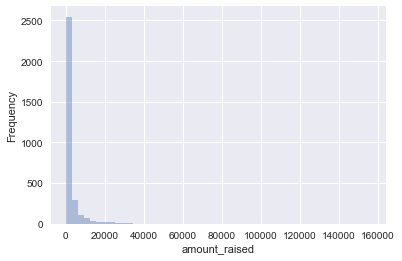

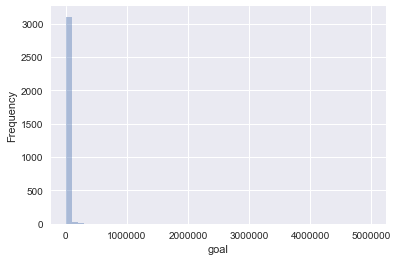

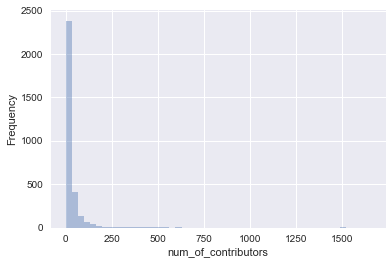

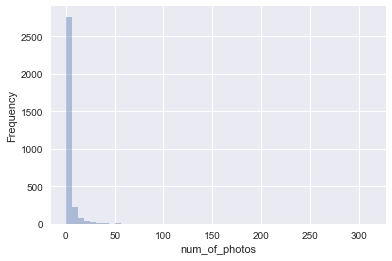

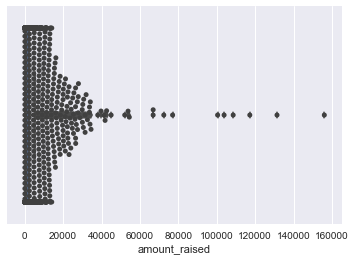

In [ ]:
explore_dataset(fundrazr)

In [38]:
def remove_punctuation(text):
    '''
    text: a string
    returns: a string without any punctation
    '''
    words = word_tokenize(text)
    words_punc_removed = [word for word in words if word.lower() not in string.punctuation]
    return " ".join(words_punc_removed)

In [23]:
def get_only_words(text):
    '''
    text: a string
    returns: string without digits, punctuation and special characters
    '''

    return " ".join(re.findall("[a-zA-Z]+", text))

In [24]:
get_only_words("34 words in that sentence!")

'words in that sentence'

In [16]:
def expand_contractions(text):
    '''
    text: a string
    returns: a string without word contractions
    '''
    words = text.split()
    list_of_words = []
    for word in words:
        if word in contractions_list.keys():
            list_of_words.append(contractions_list[word])
        else:
            list_of_words.append(word)
            
    return " ".join(list_of_words)         
    

In [17]:
expand_contractions("we'll have to I'll wouldn't")

'we will have to I will would not'

In [18]:
expand_contractions("come on! :) geeez don't")

'come on! :) geeez do not'

In [11]:
word_tokenize("We'll I'll don't")

['We', "'ll", 'I', "'ll", 'do', "n't"]

In [6]:
print(remove_punctation("please help me!! I need you :)"))

please help me I need you


In [32]:
def remove_stopwords(text, language="english"):
    '''
    text: a string without punctation
    language: the language of the text
    returns: string without stopwords
    '''
    stopwords_ = stopwords.words(language)
    words_in_string = text.split()
    string_stopwords_removed = [word for word in words_in_string if word not in stopwords_]
    return " ".join(string_stopwords_removed)

In [33]:
print(remove_stopwords("the dog is with me forever"))

dog forever


In [34]:
def find_POS(word):
    '''
    word: a word
    returns: the part of speech of the word
    '''
    POS = nltk.pos_tag(word)[0][1]
    #adjective tags : "JJ", "JJR", "JJS"
    if POS.lower()[0] == 'j':
        return 'a'
    #adverb tags : "RB", "RBR", "RBS"
    elif POS.lower()[0] == 'r':
        return 'r'
    #verb tags: "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"
    elif POS.lower()[0] == 'v':
        return 'v'
    #noun tags: "NN", "NNS", "NNP", "NNPS"
    else:
        return 'n'

In [35]:
print(find_POS("mouse"))

n


In [36]:
def lemmatizer(text):
    '''
    text: a string without punctuation
    returns: lemmatized form of the string
    '''
    lemma_words = []
    wnl = WordNetLemmatizer()
    for word in text.split():
        POS = find_POS(word)
        lemma_words.append(wnl.lemmatize(word, POS))
    return " ".join(lemma_words)    

In [37]:
def lemmatize(text):
    '''
    text: a string of words
    returns: lemmatized form of the string
    '''
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemma_words)

In [4]:
print(lemmatize("I cared deeply about you"))

I cared deeply about you


In [5]:
print(lemmatize("the cats ran around the parks all night long"))

the cat ran around the park all night long


In [10]:
print(lemmatizer("the cats ran around the parks all night long"))

the cat run around the park all night long


In [25]:
print(lemmatizer("I cared deeply about you"))

I care deeply about you


# Notes
* lemmatizer() works better than lemmatize()

In [38]:
def preprocess_text(df, column_name, get_only_words_=True, remove_stopwords_=True, lemmatize=True):
    
    new_column_name = 'preprocessed_' + column_name
    df[new_column_name] = df[column_name]
    if get_only_words_:
        df[new_column_name] = df[new_column_name].apply(get_only_words) 
    if remove_stopwords_:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    if lemmatize:
        df[new_column_name] = df[new_column_name].apply(remove_stopwords)
    
    return df
    

In [27]:
dummy_df1['c3'] = dummy_df1['c2']
dummy_df1

,c1,c2,c3
0,"{0, 1, 2}",let's see the dog,let's see the dog
1,"{0, 1, 2}",he came to see me!,he came to see me!
2,"{0, 1, 2}",that's it?,that's it?


In [28]:
dummy_df1['c3'] = dummy_df1['c3'].apply(lambda w: w + 'a')
dummy_df1['c3']

0     let's see the doga
1    he came to see me!a
2            that's it?a
Name: c3, dtype: object

In [29]:
dummy_df1

,c1,c2,c3
0,"{0, 1, 2}",let's see the dog,let's see the doga
1,"{0, 1, 2}",he came to see me!,he came to see me!a
2,"{0, 1, 2}",that's it?,that's it?a


In [40]:
print(preprocess_text(dummy_df1, 'c2'))

          c1                  c2 preprocessed_c2
0  {0, 1, 2}   let's see the dog  let 's see dog
1  {0, 1, 2}  he came to see me!        came see
2  {0, 1, 2}          that's it?              's


In [39]:
print(preprocess_text(subset_fundrazr, 'campaign_title'))

    amount_raised                                   campaign_title  \
0           290.0  Give Wyatt the Earth's colors for his birthday!   
1           279.0                          Help Garrett See Colors   
2           340.0                                      I need help   
3           310.0                 Help Brendan Tucker see colours!   
4           500.0         CIDP and Menieres Disease financial help   
5           349.0                 Help Dad see his future in color   
6          1815.0                      BioMats for Rain AND Dara!♥   
7           380.0     Help Sherwin see colors for his photography!   
8          5460.0  Please Help Michael Maberry a Victim of Assault   
9         11225.0           Helping Jacob ~ Ewing's Sarcoma Sucks!   
10          500.0                   Anthony's Full Color Christmas   
11          390.0            Make Isaac Happy, Help Him See Color.   
12         3300.0         Raising medical operation fee for Bradly   
13          350.0   

/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidbarnes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 